# Instructions= Use the following code block to access the diamonds dataset.
(Hint: You can access documentation about the dataset by below command
pydataset.data('diamonds', show_doc=True)

In [1]:
import pydataset
import pandas as pd

from sklearn.model_selection import train_test_split

# Importing necessary models and metrics functions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pydataset.data('diamonds')
df.to_csv('diamonds.csv', index=False)

### Q1-) Import .csv data source to Python data frame and examine the data. (i.e. check data types, convert columns to other data types if necessary, get descriptive stats of the dataset, subset your data and eliminate columns that will not be included in the training)

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamonds_df = df
first_rows = diamonds_df.head()
data_types = diamonds_df.dtypes
descriptive_stats = diamonds_df.describe()
(first_rows, data_types, descriptive_stats)

(   carat      cut color clarity  depth  table  price     x     y     z
 1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75,
 carat      float64
 cut         object
 color       object
 clarity     object
 depth      float64
 table      float64
 price        int64
 x          float64
 y          float64
 z          float64
 dtype: object,
               carat         depth         table         price             x  \
 count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
 mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
 std        0.474011      1.432621      2.234491   3989.439738      1.121761   
 min        0.200000     43.000

### Q2-) Load/import sklearn modules for model development. Find right classes/functions for Ordinary Least Squares Linear Regression, Decision Trees, Random Forest, and Gradient Boosted Tree algorithms

In [5]:
# Linear Regression: Used for predicting a continuous value by fitting a linear equation to observed data.
from sklearn.linear_model import LinearRegression

# Decision Tree Regressor: A non-linear model used for regression tasks. It splits the data into increasingly specific subsets based on feature values.
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor: An ensemble method that uses multiple decision trees to improve prediction accuracy for regression tasks.
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regressor: An ensemble technique that builds trees one at a time, where each new tree helps to correct errors made by previously trained trees, used for regression.
from sklearn.ensemble import GradientBoostingRegressor


### Q3-) Split your dataset in two parts as train and test. Train dataset will be used during model training phase. Test data will be used for out-of-sample testing after fitting the model.

In [6]:
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price']
X_encoded = pd.get_dummies(X, columns=['cut', 'color', 'clarity'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((43152, 26), (10788, 26), (43152,), (10788,))

### Q4-) Predict test data with all models. Calculate MAPE, MAE, MSE, RMSE, R^2 values by using predicted and actual values of test data. Compare your results with previous step. (Hint: use metrics functions in sklearn metrics module)

In [7]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)

models = {'Linear Regression': lin_reg,
          'Decision Tree': dt_reg,
          'Random Forest': rf_reg,
          'Gradient Boosting': gb_reg}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R-Squared
    n = X_test.shape[0]  # Number of observations
    p = X_test.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
    
    results[name] = {'MAPE': mape, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'Adjusted R^2': adjusted_r2}

results


{'Linear Regression': {'MAPE': 0.39529335164943935,
  'MAE': 737.1513665933286,
  'MSE': 1288705.4778516775,
  'RMSE': 1135.2116445190638,
  'Adjusted R^2': 0.9187372667686452},
 'Decision Tree': {'MAPE': 0.08667495252604711,
  'MAE': 361.8239247311828,
  'MSE': 558194.8231136448,
  'RMSE': 747.1243692409215,
  'Adjusted R^2': 0.964801548700309},
 'Random Forest': {'MAPE': 0.06482597499109737,
  'MAE': 270.19445885713696,
  'MSE': 302594.57901389623,
  'RMSE': 550.0859742021207,
  'Adjusted R^2': 0.980919098293388},
 'Gradient Boosting': {'MAPE': 0.12847967942846444,
  'MAE': 398.0878736986421,
  'MSE': 517483.0542644263,
  'RMSE': 719.3629503000736,
  'Adjusted R^2': 0.9673687369898208}}

### COMMENT:
#### The Random Forest regressor emerges as the most precise in predicting prices, achieving the lowest values across all error metrics (MAE, MSE, RMSE) and the highest Adjusted R², indicating its strong predictive power for this dataset. The Decision Tree and Gradient Boosting models, while also exhibiting high Adjusted R² values, fall short of the Random Forest's performance. In contrast, the Linear Regression model lags behind, demonstrating a lower capability in this comparison.

### $ \text{Adjusted } R^2 = 1 - \left(1-R^2\right) \times \frac{n-1}{n-p-1} $

### Q5-) Plot predicted values vs actual values and residuals vs actual values as two separate plots. (Hint: use seaborn scatterplot function)

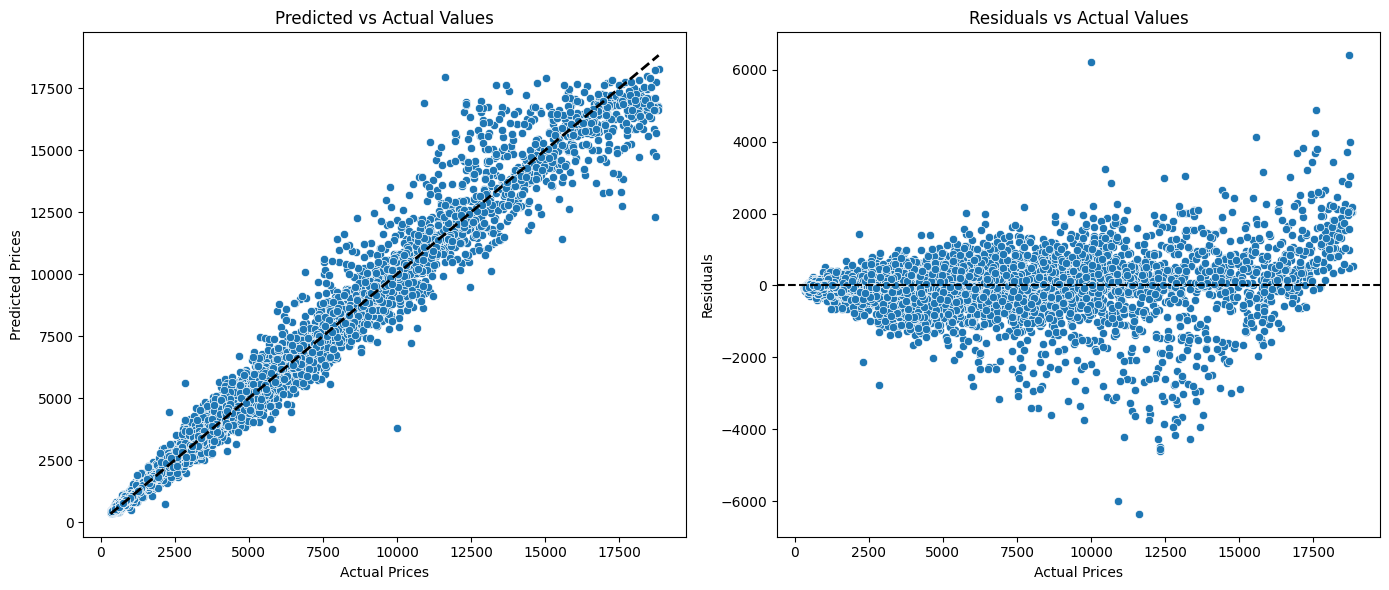

In [8]:
model = rf_reg
y_pred = model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for reference

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--') 

plt.tight_layout()
plt.show()


### COMMENT:
#### The pair of charts illustrates the efficacy of the Random Forest model in forecasting:

#### Predicted vs. True Value Scatter Plot: This plot pairs the model's price forecasts with the genuine figures, where data points ideally cluster near the dashed diagonal, signifying precise predictions.

#### Residuals vs Actual Values: Here, the vertical deviations (residuals) of the predicted prices from their true values are plotted against those true values. A balanced scatter around the zero line, marked by a dashed horizontal, is the desired pattern, indicating no bias in the prediction errors.

#### From these graphs, it's evident the model is quite effective overall, though it may falter slightly when estimating more expensive items, as seen by a rise in residuals for pricier items. This points to a potential area for model refinement.